Построить график по отфильтрованным данным (первый вариант графического исполнения)

In [2]:
import pathlib


ROOT_DIR = pathlib.Path('.').parent
ROOT_DIR

PosixPath('.')

In [3]:
FILE_CSV_PATH = ROOT_DIR / 'data.csv'
FILE_CSV_PATH

PosixPath('data.csv')

In [4]:
import pandas as pd

In [5]:
data_frame = pd.read_csv(FILE_CSV_PATH, delimiter=',')
data_frame

,Наименование Авиакомпании,Общее количество рейсов выполненых ВСЕГО,Общее количество рейсов Задержанных ИТОГО,Общее количество рейсов Задержанных ПРОЦЕНТ,Количество рейсов задержанных более двух часов ВСЕГО,Количество рейсов задержанных более двух часов РАСП,Количество рейсов задержанных более двух часов В/р ВНУТР,Количество рейсов задержанных более трех часов ВСЕГО,Количество рейсов задержанных более трех часов РАСП,Количество рейсов задержанных более трех часов В/р ВНУТР,Количество рейсов задержанных более четырех часов ВСЕГО,Количество рейсов задержанных более четырех часов РАСП,Количество рейсов задержанных более четырех часов В/р ВНУТР,Количество рейсов задержанных более пяти часов ВСЕГО,Количество рейсов задержанных более пяти часов РАСП,Количество рейсов задержанных более пяти часов В/р ВНУТР,Количество рейсов задержанных более шести часов ВСЕГО,Количество рейсов задержанных более шести часов РАСП,Количество рейсов задержанных более шести часов В/р ВНУТР,Unnamed: 19
0,АВРОРА авиакомпания (АО),1767,57,3.23,17,15,2,8,7,1,7,6,1,8,8,0,17,16,1,NaN
1,АЗУР ЭЙР,57,4,7.02,1,1,0,2,1,1,0,0,0,0,0,0,1,1,0,NaN
2,АЙ ФЛАЙ,5,1,20.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,NaN
3,АЛРОСА авиакомпания,658,54,8.21,20,8,12,17,11,6,7,4,3,2,2,0,8,4,4,NaN
4,АНГАРА авиакомпания,833,37,4.44,17,11,6,13,8,5,3,1,2,0,0,0,4,3,1,NaN
5,АЭРОФЛОТ-РОССИЙСКИЕ АВИАЛИНИИ,8404,328,1.78,161,159,2,71,71,0,32,32,0,18,18,0,46,43,3,NaN
6,ВИМ-АВИА авиакомпания,800,90,11.25,22,22,0,30,29,1,5,5,0,1,1,0,32,31,1,NaN
7,ГАЗПРОМ АВИА авиапредприятие,533,30,5.63,13,0,13,6,0,6,4,0,4,4,0,4,3,0,3,NaN
8,ГЛОБУС (ООО) а/к,2312,54,2.34,16,16,0,11,11,0,6,6,0,4,4,0,17,17,0,NaN
9,ИЖАВИА а/к,305,9,2.95,3,2,1,0,0,0,3,0,3,0,0,0,3,3,0,NaN


In [6]:
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [7]:
name_company_list = data_frame[['Наименование Авиакомпании']].values.tolist()
quantity_fly = data_frame[['Общее количество рейсов выполненых ВСЕГО']].values.tolist()
quantity_no_fly = data_frame[['Общее количество рейсов Задержанных ИТОГО']].values.tolist()

In [8]:
from itertools import chain


list_fly = list(chain.from_iterable(quantity_fly))

In [9]:
list_no_fly = list(chain.from_iterable(quantity_no_fly))

In [10]:
company_list = [name for group in name_company_list for name in group]

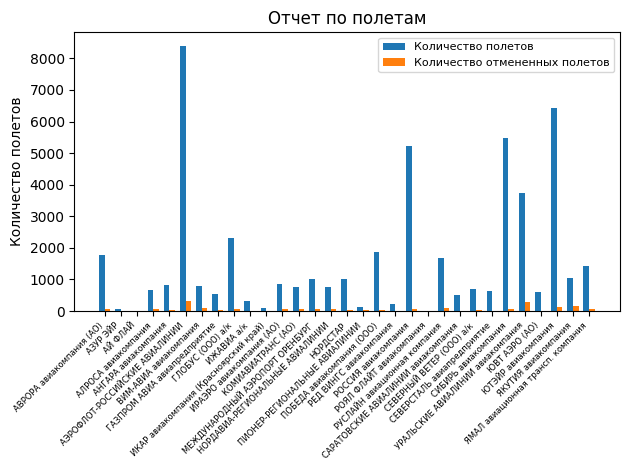

In [12]:
x = np.arange(len(company_list))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, list_fly, width, label='Количество полетов')
rects2 = ax.bar(x + width/2, list_no_fly, width, label='Количество отмененных полетов')


ax.set_ylabel('Количество полетов')
ax.set_title('Отчет по полетам')
ax.set_xticks(x, company_list, fontsize=6)
ax.set_xticklabels(company_list, rotation=45, ha='right')
ax.legend(fontsize=8)

# ax.bar_label(rects1, padding=50, rotation=90, fontsize=6)
# ax.bar_label(rects2, padding=50, rotation=90, fontsize=6)

fig.tight_layout()

plt.show()

Построить график по отфильтрованным данным (второй вариант графического исполнения)

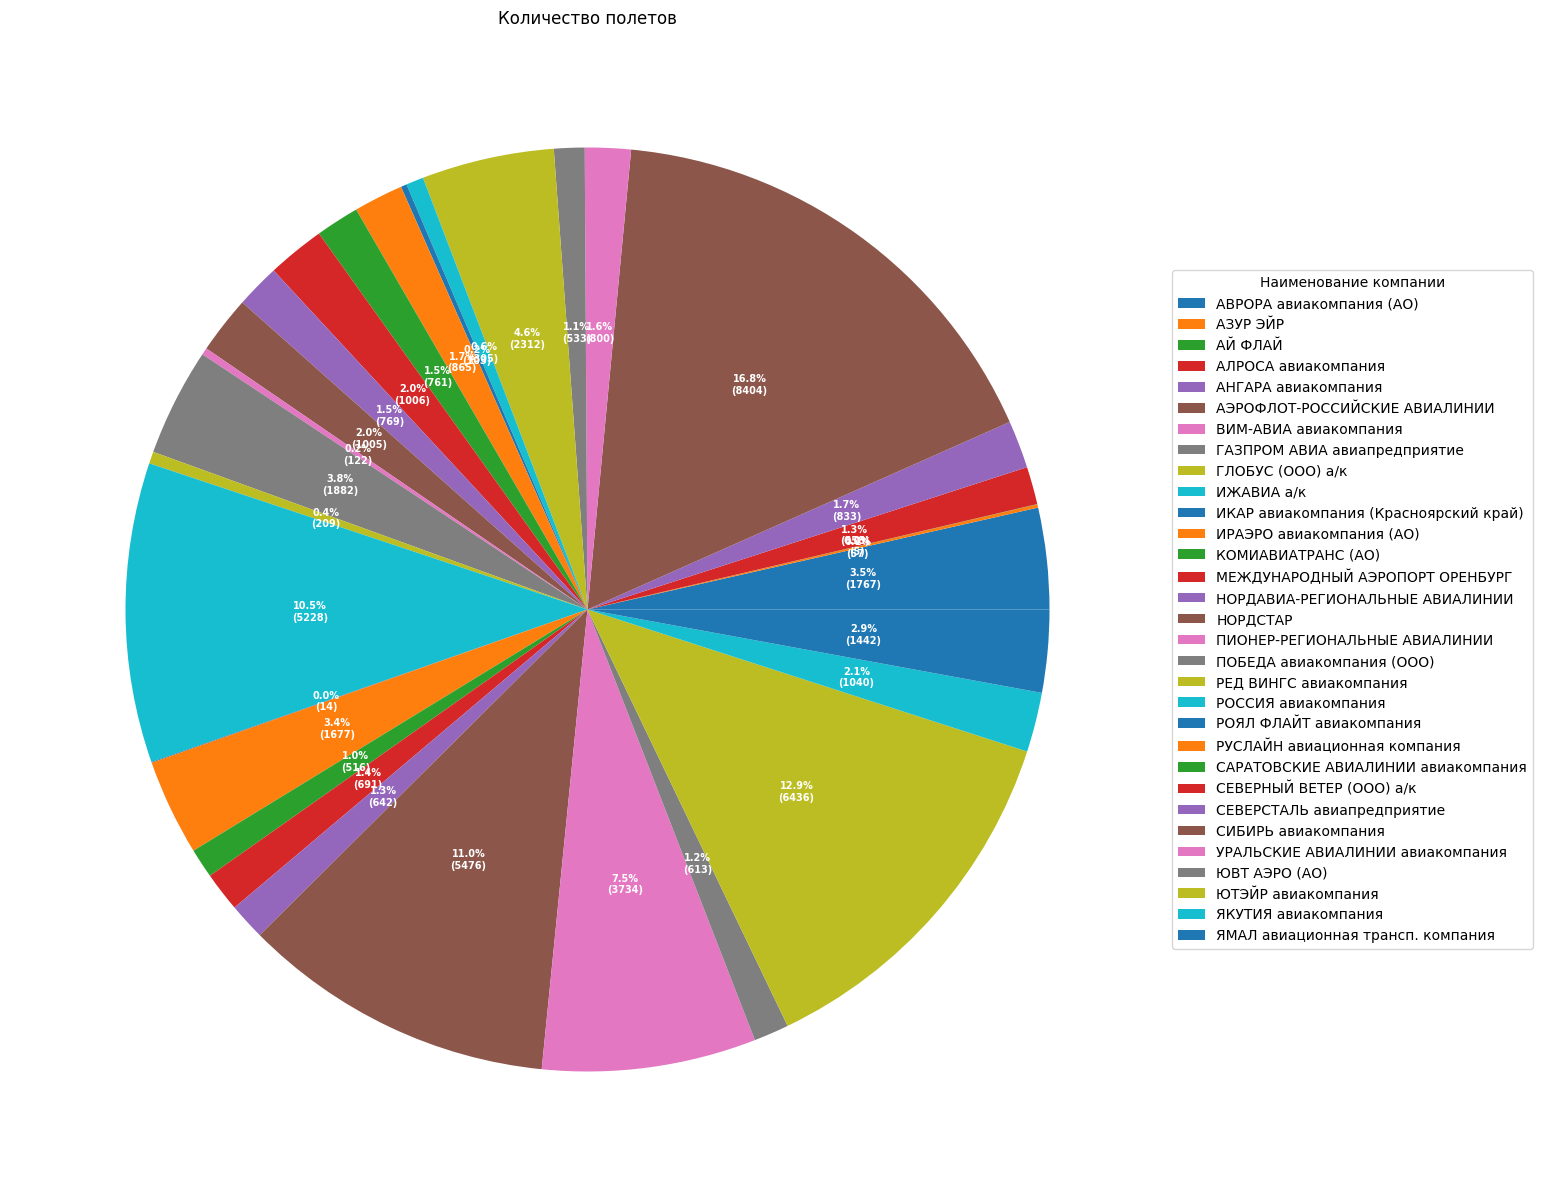

In [50]:
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))

name_company = data_frame[['Наименование Авиакомпании']].values.tolist()
company_fly = data_frame[['Общее количество рейсов выполненых ВСЕГО']].values.tolist()

# recipe = ["375 g flour",
#           "75 g sugar",
#           "250 g butter",
#           "300 g berries"]
# data = [float(x.split()[0]) for x in recipe]


title_name_company = [','.join(x) for x in name_company]
# quantity_company_fly = [float(','.join(x)) for x in company_fly]
quantity_company_fly = list(chain.from_iterable(company_fly))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(quantity_company_fly, autopct=lambda pct: func(pct, quantity_company_fly),
                                  textprops=dict(color="w"))

ax.legend(wedges, title_name_company,
          title="Наименование компании",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=7, weight="bold")

ax.set_title("Количество полетов")

plt.show()